In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),\
                                        torchvision.transforms.Normalize((0.5,), (0.5,))])

In [ ]:
batch_size=100
learning_rate=0.02
num_epochs=50

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=batch_size,
                                            shuffle=False, 
                                            num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
images.size()

torch.Size([100, 1, 28, 28])

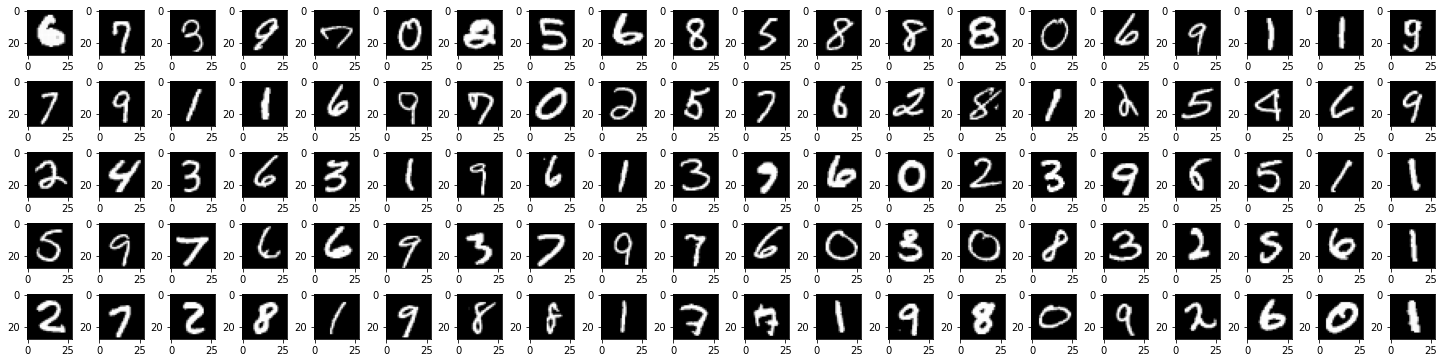

In [ ]:
np_images=images.numpy()
rows, cols = 5, 20
fig, axs = plt.subplots(rows, cols, figsize = (20, 5))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(np_images[cols*i + j, 0], cmap='gray')
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
class myCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,3)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        self.flatten=nn.Flatten()
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=self.flatten(x)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
net=myCNN()
print(net)

myCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
optimizer=optim.SGD(net.parameters(), lr=learning_rate)
criterion=nn.CrossEntropyLoss()

In [ ]:
count=0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(trainloader):
        inputs=inputs.to(device)
        labels=labels.to(device)
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        net.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 200 == 199:
            print("epoch #{}: {}~{}: loss {}".format(epoch, i-199, i, loss))
        if i % 100 == 99:
            correct = 0
            total = 0
            for inputs, labels in testloader:
                inputs=inputs.to(device)
                labels=labels.to(device)
                outputs=net(inputs)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        count+=1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch #0: 0~199: loss 2.2383463382720947
epoch #0: 200~399: loss 0.7882423996925354
epoch #0: 400~599: loss 0.21037410199642181
epoch #1: 0~199: loss 0.3499637246131897
epoch #1: 200~399: loss 0.24276159703731537
epoch #1: 400~599: loss 0.1497255563735962
epoch #2: 0~199: loss 0.11243877559900284
epoch #2: 200~399: loss 0.14931926131248474
epoch #2: 400~599: loss 0.10374964773654938
epoch #3: 0~199: loss 0.11695844680070877
epoch #3: 200~399: loss 0.07170422375202179
epoch #3: 400~599: loss 0.060769058763980865
epoch #4: 0~199: loss 0.06399137526750565
epoch #4: 200~399: loss 0.06776533275842667
epoch #4: 400~599: loss 0.047311097383499146
epoch #5: 0~199: loss 0.09395796805620193
epoch #5: 200~399: loss 0.10348231345415115
epoch #5: 400~599: loss 0.025095591321587563
epoch #6: 0~199: loss 0.020322203636169434
epoch #6: 200~399: loss 0.03250296413898468
epoch #6: 400~599: loss 0.16185276210308075
epoch #7: 0~199: loss 0.08691582083702087
epoch #7: 200~399: loss 0.08224006742238998
epoc

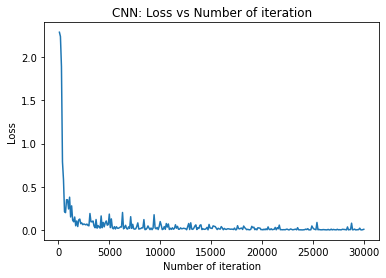

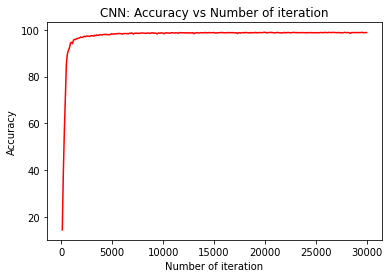

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
print(accuracy_list[-1])

tensor(98.8600, device='cuda:0')
